In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('data/player_data.csv')

In [14]:
data.head()

,player_name,unique_id,age,overall_score,height,weight,preferred_foot,best_position,player_value,weekly_wage,crossing,finishing,heading_accuracy,short_passing,volley,dribbling,curves,free_kick_accuracy,long_pass,ball_control,acceleration,sprint_speed,agility,reaction,balance,shot_power,jumping,stamina,strength,long_shot,aggression,interception,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,pace,shooting,passing,dribble,defense,physical,height_cm,weight_kg
0,Neymar Jr,190871,27,92,"5'9""",150lbs,Right,LW,$119.2M,$328K,87,87,62,87,87,96,88,89,81,95,94,89,96,92,84,80,61,81,49,85,51,36,87,90,92,94,35,30,29,5 ★,5★,High,Medium,91,85,87,95,36,58,175.26,68.04
1,L. Messi,158023,32,94,"5'7""",159lbs,Left,RW,$107.9M,$633K,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,4 ★,4★,Medium,Low,87,92,92,96,39,66,170.18,72.12
2,K. Mbappé,231747,20,89,"5'10""",161lbs,Right,ST,$105.7M,$170K,78,89,75,82,81,90,79,63,70,89,96,96,92,91,83,84,76,86,76,79,62,38,90,80,70,84,34,34,32,4 ★,5★,High,Low,96,85,78,90,39,76,177.80,73.03
3,V. van Dijk,203376,27,91,"6'4""",203lbs,Right,CB,$101.7M,$271K,53,52,87,79,45,70,60,70,83,77,74,79,61,89,53,81,90,75,92,64,83,90,47,65,62,90,93,93,86,3 ★,2★,Medium,Medium,77,60,70,71,91,86,193.04,92.08
4,K. De Bruyne,192985,28,91,"5'11""",154lbs,Right,CAM,$101.7M,$418K,94,82,55,92,82,87,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,63,88,94,82,91,68,62,53,5 ★,4★,High,High,76,86,92,87,62,78,180.34,69.85


In [8]:
#convert height to centimeters
cen_in_feet = 12 # 1 foot = 12 inches
cen_in_inch = 2.54 # 1 inch = 2.54 centimeters
height_cm = []
for i in list(data['height'].str.replace("'",'').str.replace('"', '')):
    feet = int(i[0])
    inches = int(i[1:])
    
    centimeters = round((((feet * 12) + inches) * 2.54), 2)
    height_cm.append(centimeters)

data['height_cm'] = height_cm

In [13]:
#weight in kg
data['weight_kg'] = round(data.weight.str.extract('(\d+)').astype(int)/2.20462, 2)

In [16]:
def get_stats(column):
    print('mean {}'.format(column), data[column].mean())
    print('Standard Deviation {}'.format(column), data[column].std())
    sns.set()
    plt.title('{} Histogram'.format(column))
    data[column].hist(bins=10)

mean height_cm 181.17916029752993
Standard Deviation height_cm 6.780179938471034


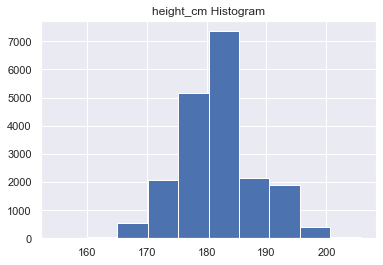

In [18]:
get_stats('height_cm')

mean weight_kg 75.09823754203985
Standard Deviation weight_kg 7.026738937344


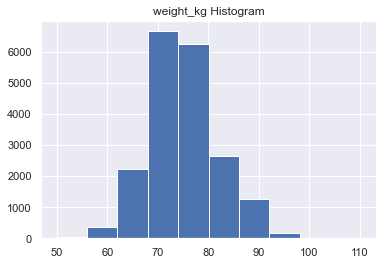

In [19]:
get_stats('weight_kg')

In [20]:
#explore player wages
wage_comp = data[['player_name','player_value','weekly_wage','best_position','age']]

In [21]:
wage_comp.head()

,player_name,player_value,weekly_wage,best_position,age
0,Neymar Jr,$119.2M,$328K,LW,27
1,L. Messi,$107.9M,$633K,RW,32
2,K. Mbappé,$105.7M,$170K,ST,20
3,V. van Dijk,$101.7M,$271K,CB,27
4,K. De Bruyne,$101.7M,$418K,CAM,28


In [29]:
#clean the currency weekly_wage values
def weekly_pay(player):
    i = player.replace('$', '')
    for p in i:
        if 'K' not in p:
            converter = i
        else:
            t_ = i.replace('K', '')
            converter = float(t_)*1e3
            
    return converter

wage_comp['weekly_salary'] = wage_comp['weekly_wage'].apply(weekly_pay)
wage_comp.weekly_salary = wage_comp.weekly_salary.astype(float)

<ipython-input-29-97bbd3cc041d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_comp['weekly_salary'] = wage_comp['weekly_wage'].apply(weekly_pay)
/Users/drexhepi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
wage_comp.head()

,player_name,player_value,weekly_wage,best_position,age,weekly_salary
0,Neymar Jr,$119.2M,$328K,LW,27,328000.0
1,L. Messi,$107.9M,$633K,RW,32,633000.0
2,K. Mbappé,$105.7M,$170K,ST,20,170000.0
3,V. van Dijk,$101.7M,$271K,CB,27,271000.0
4,K. De Bruyne,$101.7M,$418K,CAM,28,418000.0


In [32]:
#clean the player_value
player_value = []
for i in wage_comp['player_value']:
    value = i.replace('$', '')
    if 'M' in value:
        mil = value.replace('M','')
        mil = round(float(mil)* 1e6, 2)
        player_value.append(mil)
    elif 'K' in value:
        tho = value.replace('K', '')
        tho = round(float(tho)* 1e3, 2)
        player_value.append(tho)
    else:
        zero = value
        player_value.append(zero)
        
        
wage_comp['player_market_value'] = player_value
wage_comp = wage_comp.drop(columns=['player_value','weekly_wage'])

<ipython-input-32-641f8c5ea997>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_comp['player_market_value'] = player_value


In [33]:
wage_comp.head()

,player_name,best_position,age,weekly_salary,player_market_value
0,Neymar Jr,LW,27,328000.0,1.192e+08
1,L. Messi,RW,32,633000.0,1.079e+08
2,K. Mbappé,ST,20,170000.0,1.057e+08
3,V. van Dijk,CB,27,271000.0,1.017e+08
4,K. De Bruyne,CAM,28,418000.0,1.017e+08


In [34]:
#whats the mean, median, min, max values for each position
#remove salary 0, a few players that dont get paid at all, these are possibly players from lower divisions 
wage_comp[wage_comp['weekly_salary']!=0].groupby('best_position')['weekly_salary'].agg(['mean','median','min','max'])

,mean,median,min,max
best_position,,,,
CAM,10875.814880,3000.0,565.0,418000.0
CB,9634.019419,3000.0,565.0,339000.0
CDM,10418.842177,3000.0,565.0,316000.0
CF,40340.509615,8000.0,565.0,418000.0
CM,15055.560748,4000.0,565.0,384000.0
GK,7026.759131,2000.0,565.0,283000.0
LB,8064.940522,3000.0,565.0,249000.0
LM,8813.889189,3000.0,565.0,198000.0
LW,17913.417112,4000.0,565.0,531000.0


In [40]:
#who is the ST getting paid the most  [Cristiano Ronaldo]
wage_comp.query('best_position=="ST" & weekly_salary>450000')

,player_name,best_position,age,weekly_salary,player_market_value
25,Cristiano Ronaldo,ST,34,463000.0,6.61e+07


In [42]:
#who is the LW getting paid the most [E.Hazard]
wage_comp.query('best_position=="LW" & weekly_salary>530000')

,player_name,best_position,age,weekly_salary,player_market_value
1,L. Messi,RW,32,633000.0,1.079e+08


In [43]:
#who is the RW getting paid the most [L. Messi]
wage_comp.query('best_position=="RW" & weekly_salary>600000')

,player_name,best_position,age,weekly_salary,player_market_value
1,L. Messi,RW,32,633000.0,1.079e+08


In [45]:
wage_comp.player_market_value = wage_comp.player_market_value.astype(int)

In [46]:
wage_comp.describe()

,age,weekly_salary,player_market_value
count,19626.000000,19626.000000,1.962600e+04
mean,24.767604,9800.188959,2.727925e+06
std,4.687726,22964.514254,6.186951e+06
min,16.000000,0.000000,0.000000e+00
25%,21.000000,1000.000000,3.670000e+05
50%,24.000000,3000.000000,7.910000e+05
75%,28.000000,8000.000000,2.300000e+06
max,47.000000,633000.000000,1.192000e+08


In [47]:
data.head()

,player_name,unique_id,age,overall_score,height,weight,preferred_foot,best_position,player_value,weekly_wage,crossing,finishing,heading_accuracy,short_passing,volley,dribbling,curves,free_kick_accuracy,long_pass,ball_control,acceleration,sprint_speed,agility,reaction,balance,shot_power,jumping,stamina,strength,long_shot,aggression,interception,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,pace,shooting,passing,dribble,defense,physical,height_cm,weight_kg
0,Neymar Jr,190871,27,92,"5'9""",150lbs,Right,LW,$119.2M,$328K,87,87,62,87,87,96,88,89,81,95,94,89,96,92,84,80,61,81,49,85,51,36,87,90,92,94,35,30,29,5 ★,5★,High,Medium,91,85,87,95,36,58,175.26,68.04
1,L. Messi,158023,32,94,"5'7""",159lbs,Left,RW,$107.9M,$633K,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,4 ★,4★,Medium,Low,87,92,92,96,39,66,170.18,72.12
2,K. Mbappé,231747,20,89,"5'10""",161lbs,Right,ST,$105.7M,$170K,78,89,75,82,81,90,79,63,70,89,96,96,92,91,83,84,76,86,76,79,62,38,90,80,70,84,34,34,32,4 ★,5★,High,Low,96,85,78,90,39,76,177.80,73.03
3,V. van Dijk,203376,27,91,"6'4""",203lbs,Right,CB,$101.7M,$271K,53,52,87,79,45,70,60,70,83,77,74,79,61,89,53,81,90,75,92,64,83,90,47,65,62,90,93,93,86,3 ★,2★,Medium,Medium,77,60,70,71,91,86,193.04,92.08
4,K. De Bruyne,192985,28,91,"5'11""",154lbs,Right,CAM,$101.7M,$418K,94,82,55,92,82,87,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,63,88,94,82,91,68,62,53,5 ★,4★,High,High,76,86,92,87,62,78,180.34,69.85
